In [1]:
# data manipulation
import numpy as np
import pandas as pd
# visualization
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# printing results
import matplotlib.pyplot as plt
# encoding labels
from sklearn.preprocessing import LabelEncoder
# scaler
from sklearn.preprocessing import StandardScaler

In [2]:
ds = ['emodb', 'emovo', 'ravdess']

In [3]:
md = {}
for d in ds:
    md[d] = pd.read_csv(f"/datasets/nicolas_facchinetti/processed_data/{d}/metadata_pre_aug.csv")
    
    # md[d] = pd.read_csv(f"D:\\Scuola\\TesiMag\\thesis_adversarial_ml_audio\\processed_data/{d}/metadata_pre_aug.csv")

In [4]:
md['emodb']

,path,filename,chunk,label,actor,gender
0,/datasets/nicolas_facchinetti/emodb/data/13a05...,13a05Tc.wav,0,sad,13,f
1,/datasets/nicolas_facchinetti/emodb/data/13a05...,13a05Tc.wav,1,sad,13,f
2,/datasets/nicolas_facchinetti/emodb/data/14b09...,14b09Ac.wav,0,fear,14,f
3,/datasets/nicolas_facchinetti/emodb/data/11b02...,11b02Na.wav,0,neutral,11,m
4,/datasets/nicolas_facchinetti/emodb/data/09b03...,09b03Fd.wav,0,happy,9,f
...,...,...,...,...,...,...
675,/datasets/nicolas_facchinetti/emodb/data/11b03...,11b03Td.wav,1,sad,11,m
676,/datasets/nicolas_facchinetti/emodb/data/12b02...,12b02Na.wav,0,neutral,12,m
677,/datasets/nicolas_facchinetti/emodb/data/14b01...,14b01Eb.wav,0,disgust,14,f
678,/datasets/nicolas_facchinetti/emodb/data/14b01...,14b01Eb.wav,1,disgust,14,f


In [5]:
sgrams = {}
for d in ds:
    sgrams[d] = np.load(f"/datasets/nicolas_facchinetti/processed_data/{d}/sgram_pre_aug.npy")
    # sgrams[d] = sgram_ravdess = np.load(f"D:\\Scuola\\TesiMag\\thesis_adversarial_ml_audio\\processed_data/{d}/sgram_pre_aug.npy")

np.shape(sgrams['emodb'])

(680, 128, 261)

Since the samples are in tabular form, flatten each samples' matrix to a row. Also standardize the data

In [6]:
for d in ds:
    sgrams[d] = [sample.flatten() for sample in sgrams[d]]
    scaler = StandardScaler()
    sgrams[d] = scaler.fit_transform(sgrams[d])

Define a function for plotting the scatter plots

In [7]:
import matplotlib.cm as cm

def print_axis(components, targets, classes): 
    scatter_x = components[:, 0]
    scatter_y = components[:, 1]
    group = np.array([1,3,2,1,3]) #targets
    
    colors = cm.rainbow(np.linspace(0, 1, len(classes)))
    plt.figure(figsize = (12,8))
    for g in np.unique(targets):
        ix = np.where(targets == g)
        plt.scatter(scatter_x[ix], scatter_y[ix], c = colors[g].reshape(1,-1), label = classes[g], s=20, alpha=0.6)
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.legend()

# PCA

In [8]:
def print_pca(metadata, logmelspectrograms):
    # Separating out the target
    y = metadata['label']
    #Scaling the feature columns
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)
    
    # apply PCA to data
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(logmelspectrograms)
    print(f"Explained variance with 2 principal components {np.sum(pca.explained_variance_ratio_)}")
    
    print_axis(principalComponents, y, encoder.classes_)

Explained variance with 2 principal components 0.552079565998586


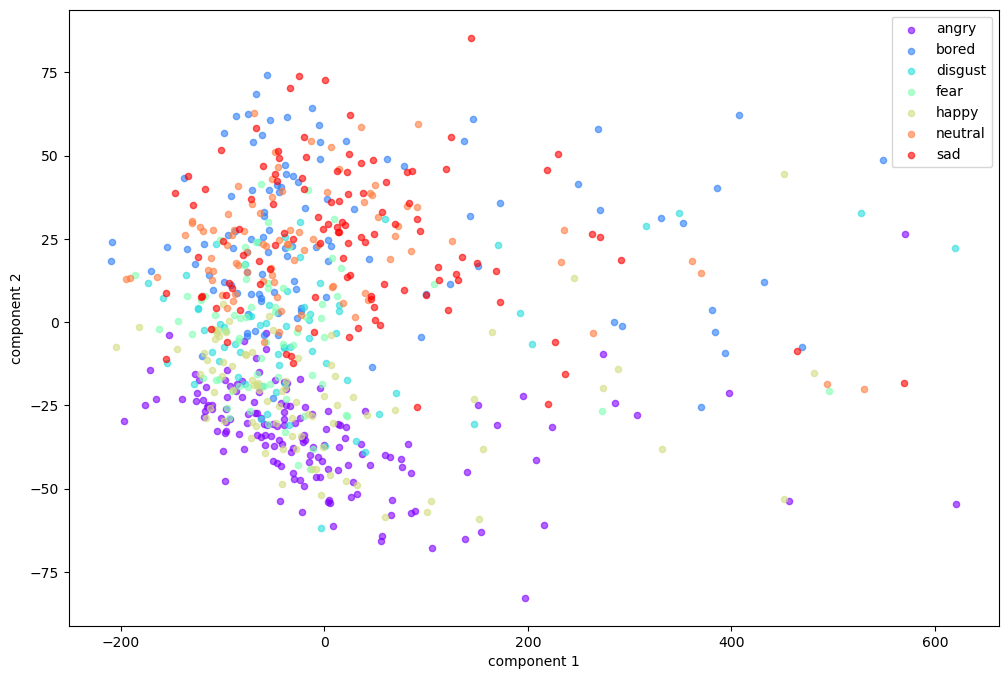

In [9]:
print_pca(md['emodb'], sgrams['emodb'])

Explained variance with 2 principal components 0.7096265418055178


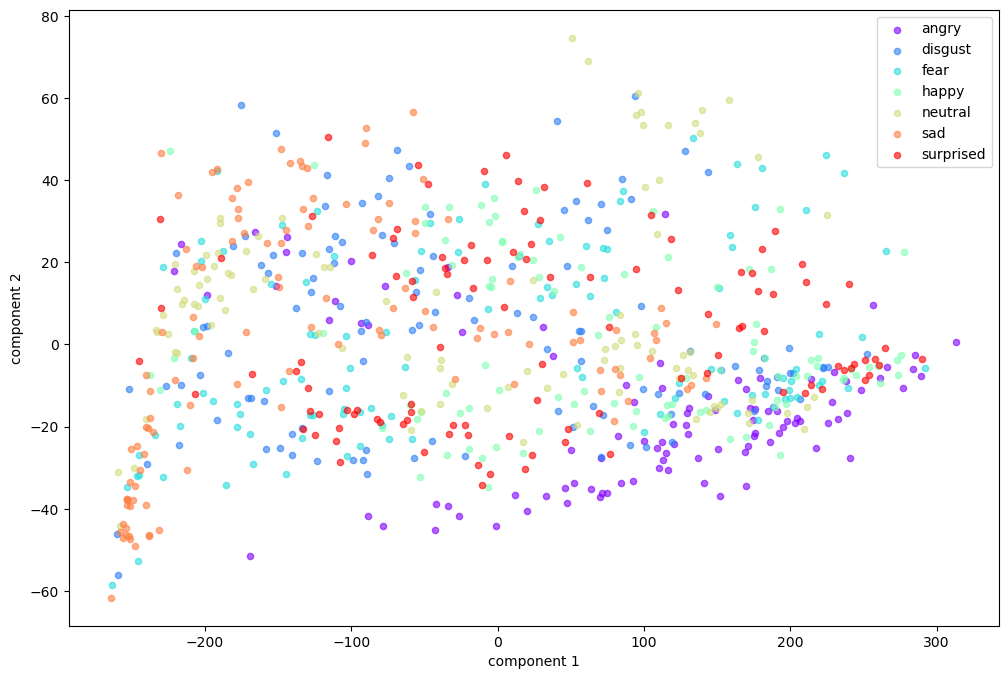

In [10]:
print_pca(md['emovo'], sgrams['emovo'])

Explained variance with 2 principal components 0.7429367173621461


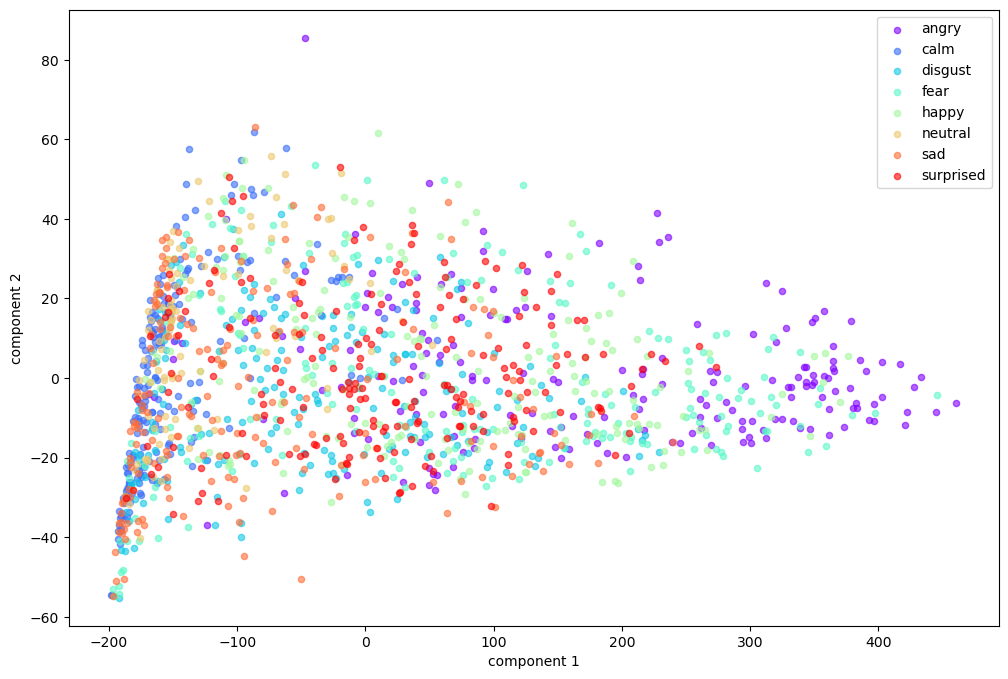

In [11]:
print_pca(md['ravdess'], sgrams['ravdess'])

# T-SNE

To further reduce the noise and speed-up the computation I let PCA to extract the number of principal components to explain at lest 90% of variance and use them as input for T-SNE.

In [12]:
def print_tsne(metadata, logmelspectrograms, per):
    # Separating out the target
    y = metadata['label']
    #Scaling the feature columns
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)
    
    # apply PCA to data
    pca = PCA(0.9)
    principalComponents = pca.fit_transform(logmelspectrograms)
    print(f"Number of extracted components {pca.n_components_}")
    
    # no large datasets so exact and 3000 iter can be used
    # various perplexity as is the most influent parameter
    components = TSNE(n_components=2, perplexity=per, n_iter=3000, learning_rate='auto', method='exact', random_state= 1997, n_jobs=-1).fit_transform(principalComponents)
    print_axis(components, y, encoder.classes_)

Number of extracted components 256


/home/nicolas/.conda/envs/thesis/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


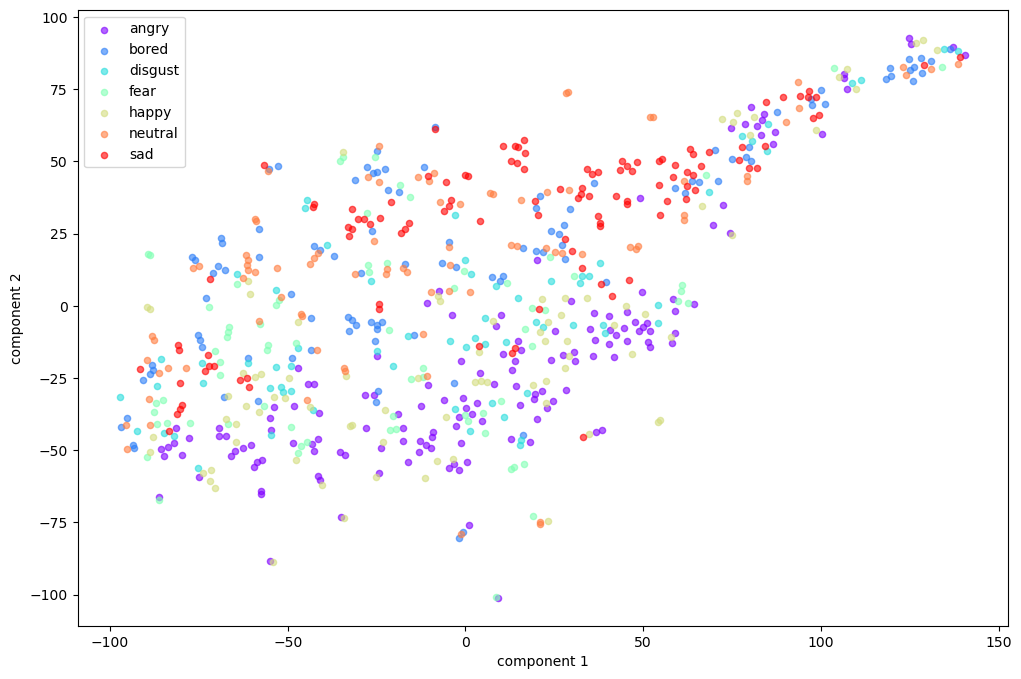

In [13]:
print_tsne(md['emodb'], sgrams['emodb'], 5)

Number of extracted components 256


/home/nicolas/.conda/envs/thesis/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


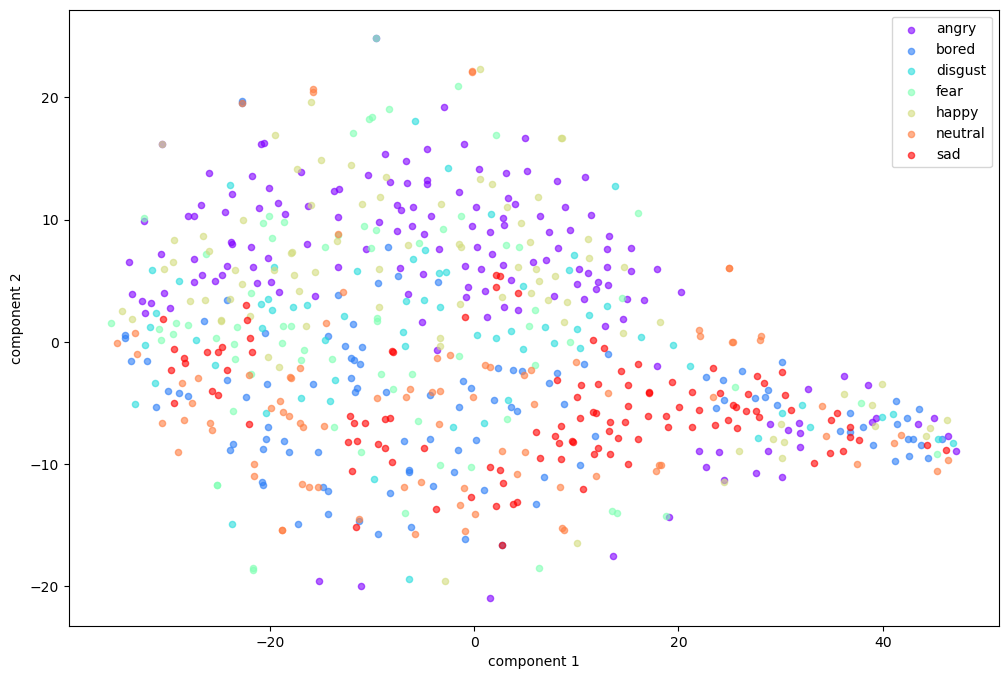

In [14]:
print_tsne(md['emodb'], sgrams['emodb'], 30)

Number of extracted components 256


/home/nicolas/.conda/envs/thesis/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


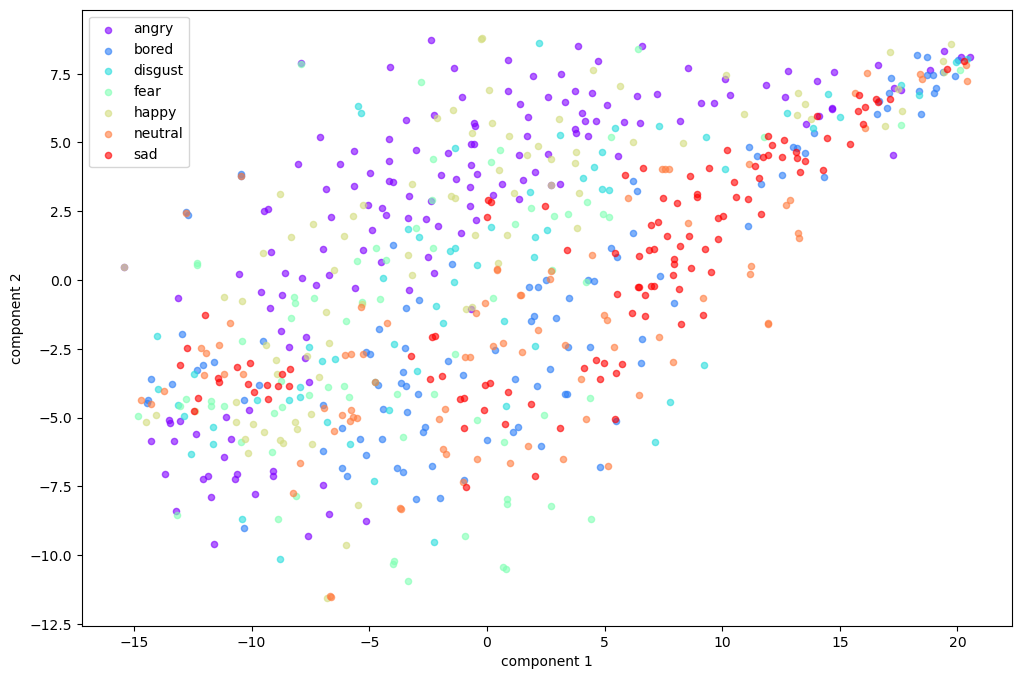

In [15]:
print_tsne(md['emodb'], sgrams['emodb'], 50)

Number of extracted components 168


/home/nicolas/.conda/envs/thesis/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


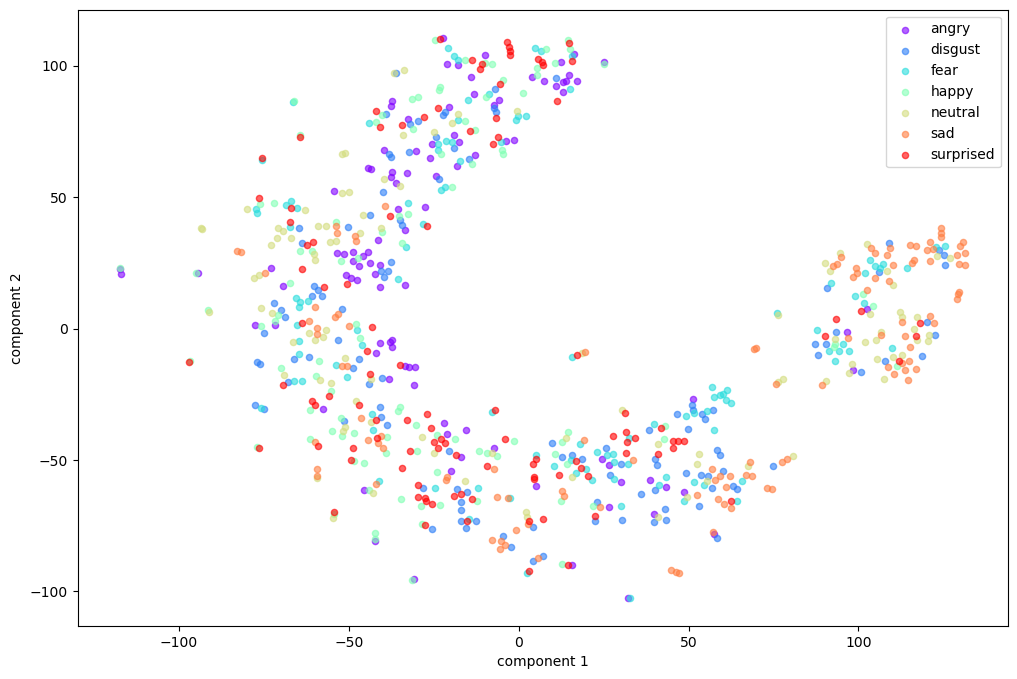

In [16]:
print_tsne(md['emovo'], sgrams['emovo'], 5)

Number of extracted components 168


/home/nicolas/.conda/envs/thesis/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


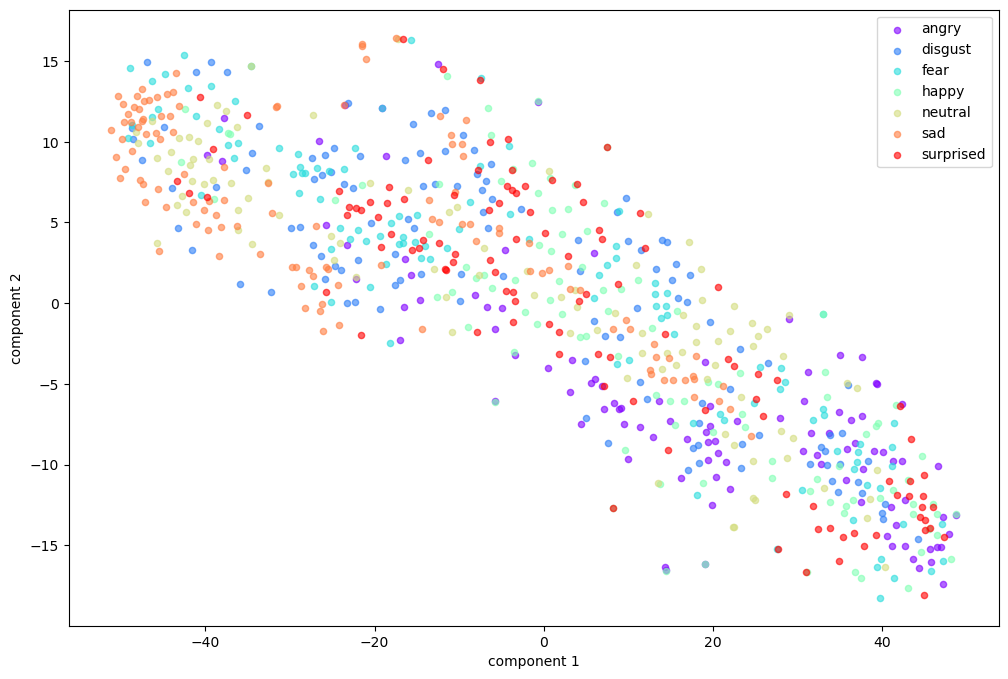

In [17]:
print_tsne(md['emovo'], sgrams['emovo'], 30)

Number of extracted components 168


/home/nicolas/.conda/envs/thesis/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


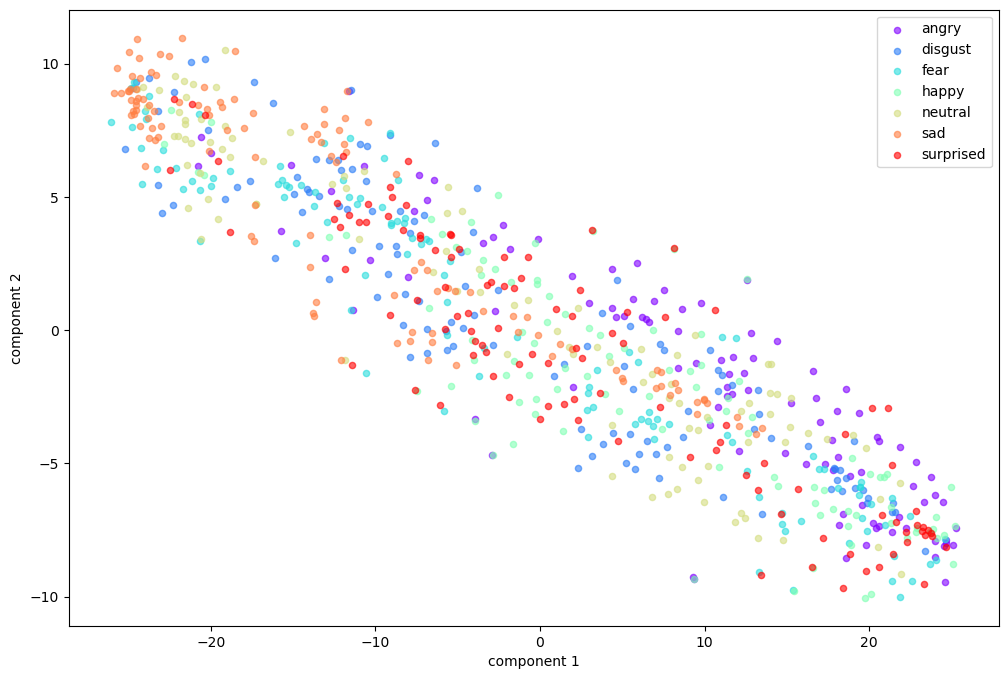

In [18]:
print_tsne(md['emovo'], sgrams['emovo'], 50)

Number of extracted components 156


/home/nicolas/.conda/envs/thesis/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


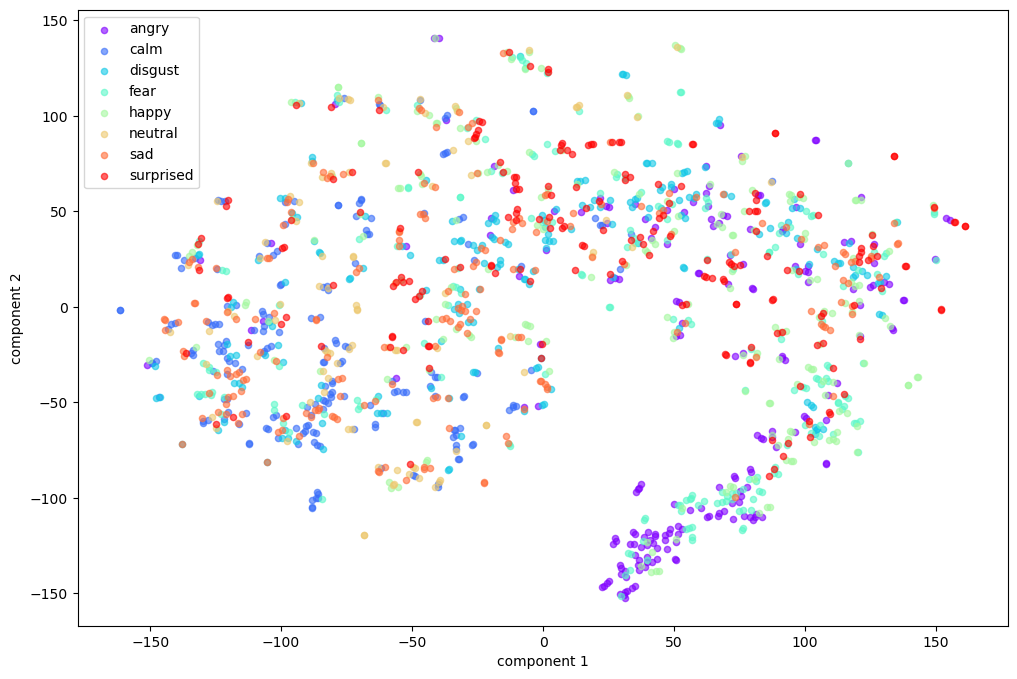

In [19]:
print_tsne(md['ravdess'], sgrams['ravdess'], 5)

Number of extracted components 156


/home/nicolas/.conda/envs/thesis/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


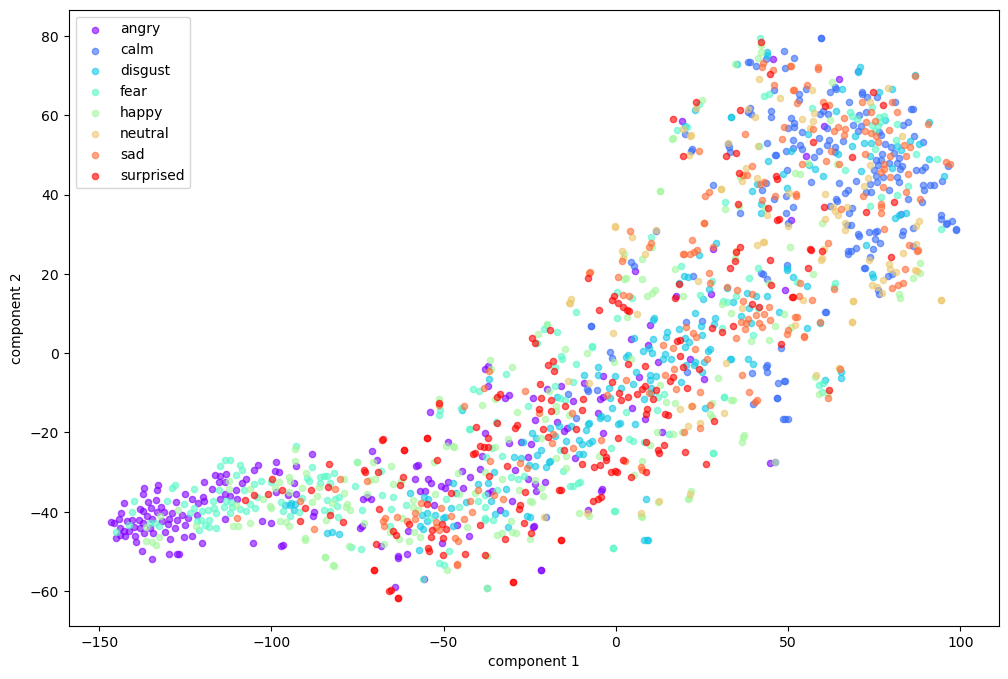

In [20]:
print_tsne(md['ravdess'], sgrams['ravdess'], 30)

Number of extracted components 156


/home/nicolas/.conda/envs/thesis/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


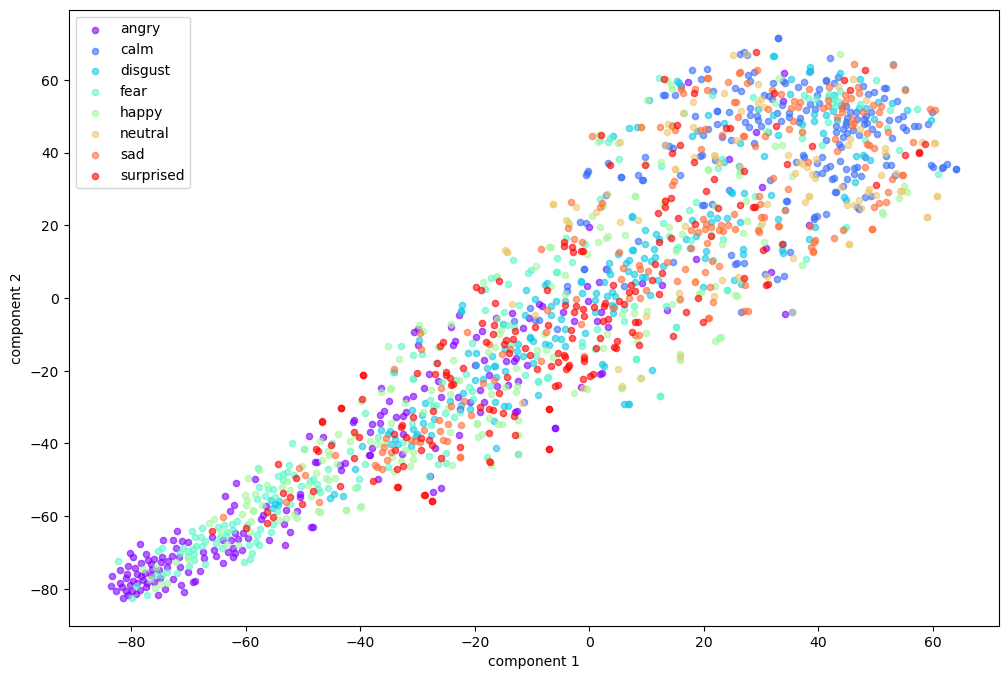

In [21]:
print_tsne(md['ravdess'], sgrams['ravdess'], 50)